# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance, and each succeeding component, in turn, has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors (each being a principal component) are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.

<img src="PCA.png" alt="Principal Component Analysis" width="400"/>

## Mathematical Formulation

Given a data matrix $X$, where each column represents a variable, and each row represents an observation, PCA transforms the original data into a new coordinate system through the following steps:

1. **Standardization (optional):** The data is normalized to have zero mean and unit variance:
   $$
   x_{std} = \frac{x - \mu}{\sigma}
   $$

2. **Covariance Matrix Computation:** The covariance matrix is calculated to understand how the variables of the data vary from the mean with respect to each other.

3. **Eigen Decomposition:** Eigenvalues and eigenvectors of the covariance matrix are computed. The eigenvectors determine the directions of the new feature space, and the eigenvalues determine their magnitude.

4. **Projection onto New Feature Space:** The original data is projected onto the new feature space.

The PCA transformation can be summarized by the equation:
$$
Y = X \cdot W
$$

Where:
- $X$ is the $d$-dimensional data set to be transformed.
- $W$ is the matrix containing the eigenvectors of the covariance matrix of $X$.
- $Y$ is the transformed $k$-dimensional feature subspace (with $k \leq d$).


In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

# PCA and Variance Explained
This function performs PCA on the provided dataset and plots the percentage of variance explained by each principal component. It also prints the explained variance ratios.


In [6]:
# Function to perform PCA and plot variance explained
def pc_12_plot(X):
    pca = PCA()
    pca.fit(X)
    percent_variance_explained = pca.explained_variance_ratio_
    plt.plot(percent_variance_explained)
    plt.title("Percent Variance Explained")
    plt.xlabel("Index of PC")
    plt.ylabel("Percent Variance")
    plt.show()
    print("Percent variance explained:")
    print(percent_variance_explained)

    # Project the data onto the principal components
    projections = pca.transform(X)
    plt.scatter(projections[:, 0], projections[:, 1])
    plt.title("PC Plot")
    plt.xlabel("Projection onto PC 1")
    plt.ylabel("Projection onto PC 2")
    plt.show()

    return pca


# PCA on Scaled Data
This function scales the data before performing PCA, which is essential for standardizing the variance across different features. It then calls the `pc_12_plot` function to plot and display the results.


In [ ]:
# Function to perform PCA on scaled data and plot variance explained
def normalized_pc_12_plot(X):
    X_scaled = scale(X)
    return pc_12_plot(X_scaled)

# Loading the Dataset
We load the California housing dataset from `sklearn.datasets` which contains the data we will be using for PCA.


In [9]:
# Load the California housing dataset
housing = fetch_california_housing()
X_housing = housing.data

# Applying PCA on Raw Data
Performing PCA on the raw housing dataset to analyze the variance explained by the principal components.


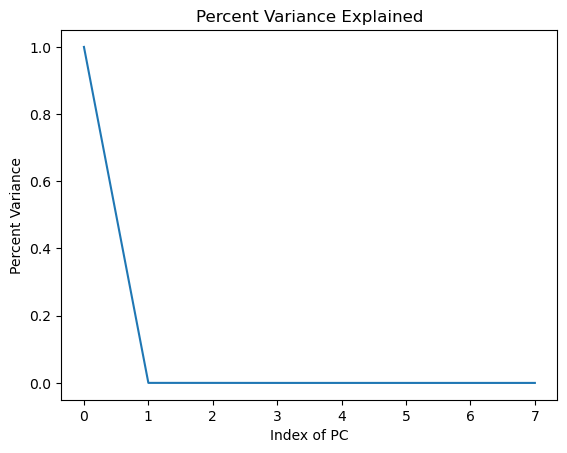

Percent variance explained:
[9.99789327e-01 1.13281110e-04 8.32834638e-05 6.44304641e-06
 5.12871119e-06 2.31833048e-06 1.94839669e-07 2.37222570e-08]


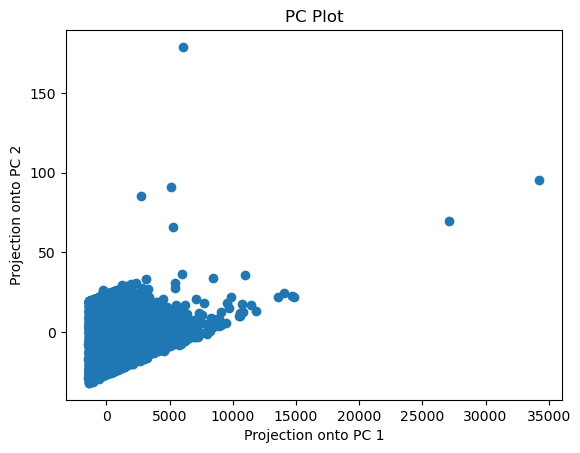

In [8]:
# Perform PCA on the raw data
pca_results_housing = pc_12_plot(X_housing)

# Applying PCA on Normalized Data
Performing PCA on the normalized housing dataset to analyze the variance explained by the principal components in a scaled feature space.


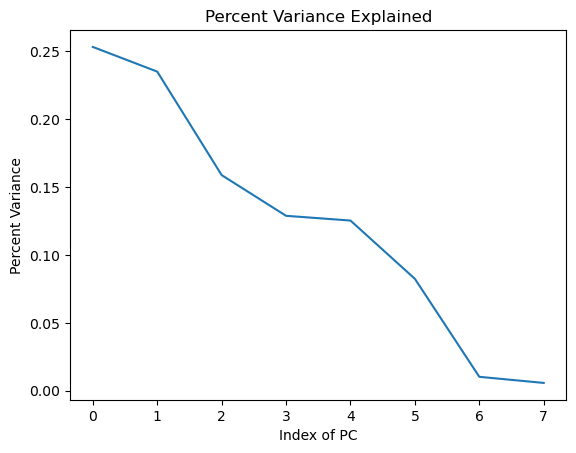

Percent variance explained:
[0.25336868 0.23516245 0.15888635 0.12887971 0.12538195 0.0824225
 0.01020022 0.00569814]


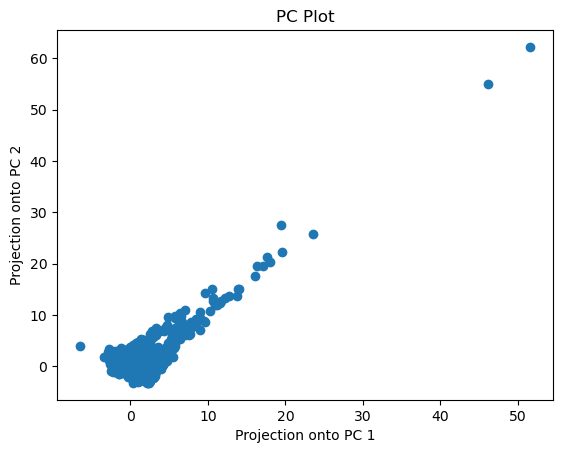

In [10]:
# Perform PCA on the normalized data
normalized_pca_results_housing = normalized_pc_12_plot(X_housing)

The normalized PCA approach considers each data column to be on a comparable scale. Consequently, the principal components that account for the most variance are determined purely by the variables' interrelations rather than their scale or range, thereby removing the impact of differing units. Therefore, the normalized PCA is generally favored over the original PCA.

# Cumulative Variance Plot
This plot shows the cumulative variance explained by the principal components, aiding in the decision of how many components to retain for the analysis.


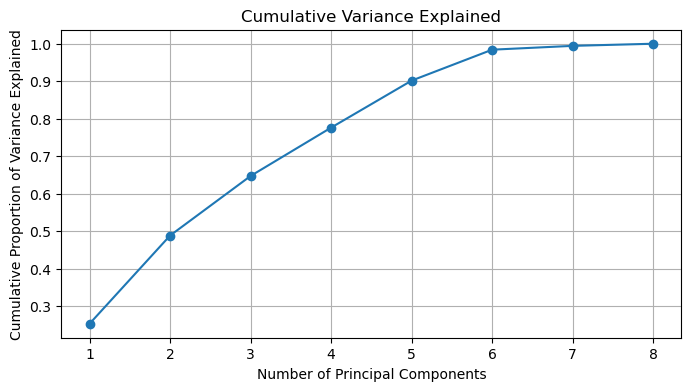

In [13]:
cumulative_variance = np.cumsum(normalized_pca_results_housing.explained_variance_ratio_)
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.title("Cumulative Variance Explained")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Proportion of Variance Explained")
plt.grid(True)
plt.show()

# Biplot Representation
The biplot graphically displays both the principal components and the original features, providing a full picture of the PCA transformation.


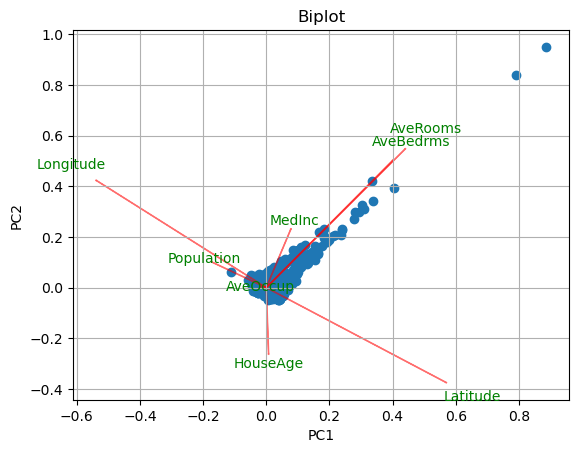

In [17]:
X_std = scale(X_housing)
pca = PCA()
pca.fit(X_std)
projections = pca.transform(X_std)

biplot(projections[:, :2], np.transpose(pca.components_[:2, :]), labels=housing.feature_names)

# 3D PCA Visualization
To gain a deeper understanding of the data structure, we visualize the first three principal components in a 3D plot.


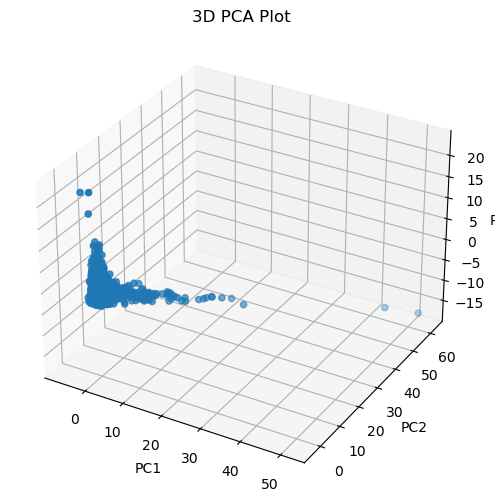

In [18]:
pca_3d = PCA(n_components=3)
pca_3d.fit(X_std)
projections_3d = pca_3d.transform(X_std)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projections_3d[:, 0], projections_3d[:, 1], projections_3d[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title("3D PCA Plot")
plt.show()

# PCA Analysis Conclusion

The PCA performed on the California Housing dataset provides two distinct sets of insights when applied to the original data versus the normalized data.

## Original Data PCA:
- The first principal component explains most of the variance, indicating that it captures the majority of the information in the dataset.
- The scatter plot of projections onto the first two principal components shows that the data points are primarily spread along the first principal component, signifying its importance.

## Normalized Data PCA:
- The variance explained by each principal component is more evenly distributed in the normalized data PCA, suggesting that feature scaling allows for a more balanced representation of each feature's importance.
- The normalized data projections show a defined spread across the first two principal components, highlighting the significance of secondary features after normalization.

## Comparative Analysis:
- Scaling the data before PCA significantly affects the distribution of explained variance across the principal components, underlining the impact of feature scaling on PCA outcomes.
- The choice between original and normalized PCA should be based on the analytical context and the relevance of feature scales in the dataset.

## Practical Implications:
- If the scale of the features is crucial, such as when larger-scale features are more influential, PCA on the original data may be more suitable.
- If all features are to be considered equally regardless of their scale, PCA on normalized data is recommended.

## Conclusion:
- PCA has effectively reduced the dimensionality of the data, emphasizing the main axes of variation with the first few principal components.
- These reduced dimensions can be leveraged for subsequent analyses like predictive modeling or clustering, potentially leading to more efficient models and deeper insights.
